# Chapter5-pandas入门

In [16]:
import pandas as pd
import numpy as np

pandas经常和其它工具一同使用，如：
- 数值计算工具：NumPy、SciPy
- 分析库：statsmodels、scikit-learn
- 数据可视化库：matplotlib

pandas是基于NumPy数组构建的，特别是基于数组的函数和不使用for循环的数据处理。

虽然pandas采用了大量的NumPy编码风格，但二者最大的不同是：
- pandas：专门为处理**表格**和**混杂数据**设计
- NumPy：更适合处理**统一**的**数值数组数据**

# 1.pandas的数据结构介绍

要使用pandas，首先就得熟悉它的两个主要数据结构：
- Series
- DataFrame

## 1.1 Series

Series是一种类似于**一维数组**的对象，它由两部分组成：
- 一组数据(各种NumPy数据类型)
- 一组与之(数据)相关的数据标签(即索引)

### 1.1.1
仅由一组数据即可产生最简单的Series：

In [3]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Series的字符串表现形式为：索引在左边，值在右边。
由于我们**没有**为数据**指定**索引，于是会**自动创建**一个0到N-1(N为数据长度)的**整数型索引**。

可以通过Series的：
- values属性：获取其**数组表示形式**
- index属性： 获取其**索引对象**

In [4]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [5]:
obj.index

RangeIndex(start=0, stop=4, step=1)

通常我们希望所创建的Series带有一个可以对**各个数据点**进行**标记**的**索引**：

In [6]:
obj2 = pd.Series([4, 7, -3, 5], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -3
c    5
dtype: int64

In [7]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

与普通的NumPy数组相比，可以通过**索引**的方式选取Series中的**单个或一组值**：

In [8]:
obj2['a']

-3

In [9]:
obj2['d']

4

In [12]:
obj2[['c', 'a', 'd']]

# ['c', 'a', 'd']是索引列表

c    5
a   -3
d    4
dtype: int64

使用**NumPy函数**或**类似NumPy**的运算(如根据布尔型数组进行过滤、标量乘法、应用数学函数等)都会保留**索引值**的**链接**：

In [13]:
obj2[obj2 > 0]

d    4
b    7
c    5
dtype: int64

In [14]:
obj2 * 2

d     8
b    14
a    -6
c    10
dtype: int64

In [17]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.049787
c     148.413159
dtype: float64

还可以将Series看成是一个**定长**的**有序字典**，因为它是**索引值**到**数据值**的一个**映射**。它可以用在许多原本需要**字典参数**的**函数**中：

In [23]:
# 判断某索引值是否在obj2中
'b' in obj2

True

In [24]:
'e' in obj2

False

### 1.1.2
如果数据被存放在一个**Python字典**中，也可以直接通过这个字典来创建Series：

In [25]:
sdata = {'Ohio':35000, 'Texas':71000, 'Oregon':16000, 'Utah':5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

如果只传入一个字典，则结果Series中的**索引**就是**原字典的键**(有序排列)。
也可以传入**排好序**的**字典的键**以改变顺序：

In [28]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

在上面的例子中，
- sdata中跟states索引**相匹配**的那3个值会被找出来并放到相应的位置上。
- 'California'所对应的sdata值找不到，所以其结果为NaN(非数字,not a number)。在pandas中，它用于表示缺失或NA值。
- 'Utah'不在states中，它被从结果中除去。

我们使用缺失(missing)或NA表示缺失数据。

pandas的**isnull和notnull函数**可用于检测缺失数据：

In [29]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [31]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series也有类似的**实例方法**：

In [32]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

将在第7章详细讲解如何处理**缺失数据**

对于许多应用而言，Series**最重要**的一个功能是：
- 它会根据运算的**索引**标签**自动对齐**数据：

In [34]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [35]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [36]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

数据对齐功能将在后面**详细讲解**，可以认为是**类似join**的操作。

Series对象**本身**及其**索引**都有一个**name属性**，该属性跟pandas其他的**关键功能**关系非常密切。

In [38]:
obj4.name = 'population'

In [39]:
obj4.index.name = 'state'

In [40]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series的**索引**可以通过**赋值**的方式**就地修改**。

In [41]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [42]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## 1.2 DataFrame
DataFrame是一个**表格型**的数据结构，它含有一组**有序的列**，每列可以是**不同的值类型**(数值、字符串、布尔值等)。

DataFrame既有**行索引**也有**列**索引，它可以被看做由**Series**组成的**字典**(共用同一个索引)。

DataFrame中的数据是以一个或多个**二维块**存放的(而不是列表、字典、或别的**一维数据结构**)。

笔记：虽然DataFrame是以**二维结构**保存数据的，但仍然可以轻松地将其表示为**更高维度**的数据(**层次化索引**的**表格型**结构,这是pandas中许多**高级数据处理功能**的关键要素，会在第8章讨论这个问题。)

### 1.2.1 建DataFrame方法

#### 1.2.1.1
建DataFrame的办法有很多，最常用的一种：直接传入一个由**等长列表或NumPy数组**组成的**字典**。

In [44]:
data = {
    'state':['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
    'year':['2000', '2001', '2002', '2001', '2002', '2003'],
    'pop':[1.5, 1.7, 3.6, 2.4, 2.9, 3.2]
}
frame = pd.DataFrame(data)

结果DataFrame会**自动加上索引**(跟Series一样)，且全部列会被**有序排列**：

In [45]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


如果使用的是Jupyter notebook，**pandas DataFrame对象**会以对浏览器友好的**HTML表格**的方式呈现。

对于特别大的DataFrame，**head方法**会选取前5行：

In [46]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


如果指定了**列序列**，则DataFrame的列就会按照**指定顺序**进行排列：

In [47]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果传入的**列在数据中找不到**，就会在结果中产生**缺失值**。

In [66]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index = ['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [51]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

通过**类似字典标记**的方式或**属性**的方式，可以将DataFrame的**列**获取为一个Series：

In [53]:
# 类似字典标记
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [55]:
# 类似属性
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: object

笔记：IPython提供了**类似属性**的访问(frame2.year)和**tab补全**：
- frame2[column]适用于任何列的名
- frame2.column只有在列名是一个合理的Python变量名时才适用

注意，返回的Series拥有原DataFrame**相同的索引**，且其**name属性**也已经被相应地设置好了。

**行**也可以通过，位置或名称的方式进行获取，比如用loc属性(稍后对此有更详细讲解)：

In [56]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

**列**可以通过__赋值__的方式进行修改。

例如，可以给那个空的'debt'列赋上**一个标量值或一组值**：

In [57]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [59]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


将**列表或数组**赋值给某个**列时**，其长度必须跟DataFrame的**长度相匹配**。

如果赋值的是一个**Series**，就会**精确匹配DataFrame的索引**，所有的**空位**都将被填上**缺失值**：

In [60]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


为**不存在的列**赋值会创建出一个**新列**。

关键字**del**用于**删除列**。

In [61]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


注意：不能用frame2.eastern创建新的列。

In [62]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

注意：通过**索引方式**返回的列是相应数据的**视图**，并不是副本。因此，对返回的Series所做的任何**就地修改**全都会反映到**源DataFrame**上。

通过Series的**copy方法**即可指定复制列。

#### 1.2.1.2
另一种常见的数据形式是**嵌套字典**。

如果嵌套字典传给DataFrmae，pandas就会解释为：外层字典的键作为**列**，内层键则作为__行索引__：

In [63]:
pop = {
    'Nevada':{2001:2.4, 2002:2.9},
    'Ohio':{2000:1.5, 2001:1.7, 2002:3.6}
}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


也可以适用__类似NumPy数组__的方法，对DataFrmae进行__转置__(交换行和列)：

In [64]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


转置后，内层字典的键会被**合并、排序**以形成最终的索引。如果明确指定了索引，则不会这样：

In [133]:
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [259]:
# pd.DataFrame(pop, index=[2001, 2002, 2003]) 出错
# 解决方案：
pd.DataFrame(pop,columns=['Nevada', 'Ohio'],index=[2001,2002,2003])

pd.DataFrame(pop,index=pd.Series([2001,2002,2003]))

pd.DataFrame(pop, index=pd.Index([2001,2002,2003]))

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


1.2.1.3
由Series组成的字典差不多也是一样的用法：

In [74]:
pdata = {
    "Ohio":frame3['Ohio'][:-1],
    "Nevada":frame3['Nevada'][:2]
}

pd.DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


下表列出了**DataFrame构造函数**所能接受的各种数据。
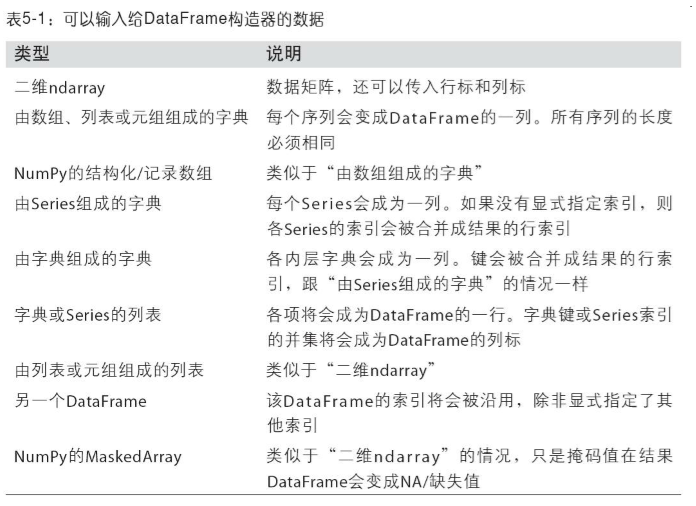

如果设置了DataFrame的**index和columns**的__name属性__，则这些信息也会被显示出来：

In [76]:
frame3.index.name = 'year'
frame3.columns.name = 'state'

frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


跟Series一样，**values属性**也会以__二维ndarray__的形式返回DataFrame中的数据：

In [77]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

如果DataFrame各列的**数据类型不同**，则__值数组的dtype__就会选用能**兼容所有列**的数据类型：

In [78]:
frame2.values

array([['2000', 'Ohio', 1.5, nan],
       ['2001', 'Ohio', 1.7, nan],
       ['2002', 'Ohio', 3.6, nan],
       ['2001', 'Nevada', 2.4, nan],
       ['2002', 'Nevada', 2.9, nan],
       ['2003', 'Nevada', 3.2, nan]], dtype=object)

## 1.3 索引对象

pandas的索引对象负责管理**轴标签和其他元数据**(比如轴名称等)。

构建Series或DataFrame时，所用到的__任何数组或其他序列__的**标签**都会被转换成一个**Index**：

In [79]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [80]:
index[1:]

Index(['b', 'c'], dtype='object')

Index对象是**不可变**的，因此用户不能对其进行修改：

In [82]:
# index[1] = 'd' # TypeError  

不可变可以使Index对象在**多个数据结构**之间__安全共享__：

In [84]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [85]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [108]:
obj2.index is labels

True

注意：虽然用户**不需要经常使用**Index的功能，但是因为一些操作会生成包含__被索引化的数据__，理解它们的工作原理是很重要的。 

除了**类似于数组**，Index的功能也类似一个__固定大小的集合__：

In [109]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [110]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [111]:
'Ohio' in frame3.columns

True

In [112]:
2003 in frame3.index

False

与python的集合不同，pandas的Index可以包含**重复的标签**:

In [113]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

选择重复的标签，会显示所有的结果。

每个索引都有一些**方法和属性**，它们可用于__设置逻辑__并回答**有关该索引所包含的数据**的常见问题。

下表列出了这些函数：

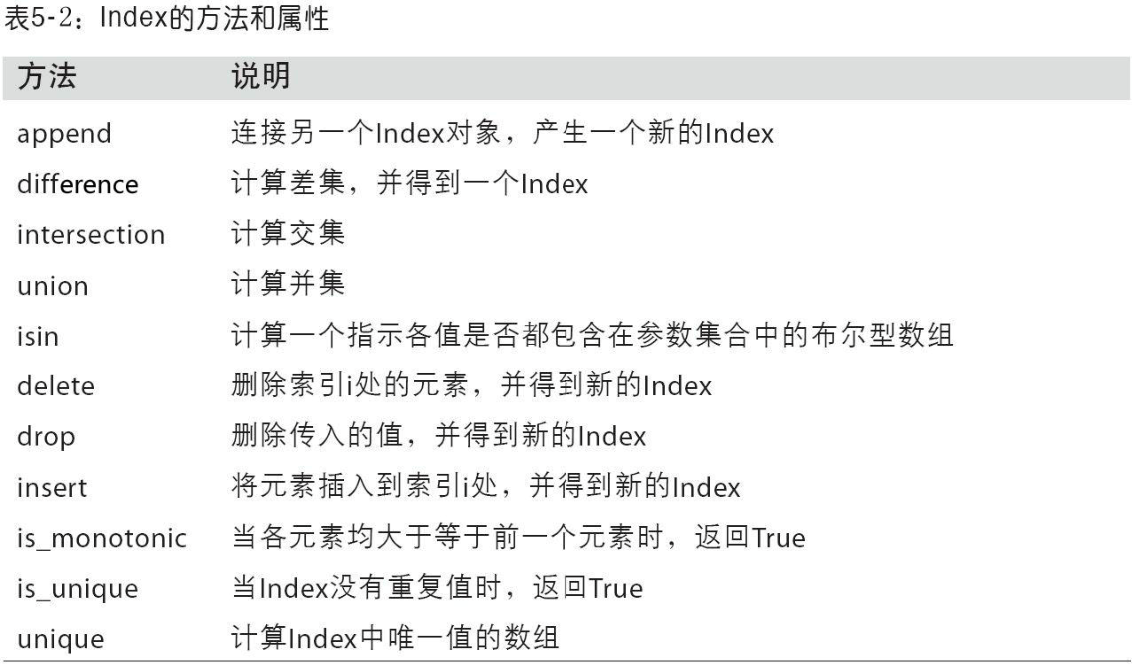

# 2.基本功能

本节中，将介绍操作**Series和DataFrame**中的数据的__基本手段__。后续章节将更加**深入地挖掘**pandas在__数据分析和处理__方面的功能。本书不是pandas库的详尽文档，主要关注的是**最重要的功能**，那些不大常用的内容（也就是那些更深奥的内容）就交给你自己去摸索吧。

## 2.1 重新索引(reindex)
pandas对象的一个**重要方法**是__reindex__，其作用是创建一个**新对象**，它的数据符合__新的索引__。例子：

In [114]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

### 2.1.1 Series的reindex

用该Series的reindex将会根据**新索引**进行__重排__。如果某个索引值当前**不存在**，就引入__缺失值__：

In [115]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

对于**时间序列**这样的__有序数据__，重新索引时可能需要做一些**插值**处理。

__method选项__即可达到此目的，例如，使用**ffill**可以实现__前向值填充__：

In [117]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0,2,4])

obj3

0      blue
2    purple
4    yellow
dtype: object

In [119]:
obj3.reindex(range(6),method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

### 2.1.2 DataFrame的reindex

借助DataFrame，reindex可以修改 **(行)索引和列**。只传递__一个序列__时，会**重新索引**结果的__行__：

In [120]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)), 
                     index=['a', 'c', 'd'], 
                     columns=['Ohio', 'Texas', 'California'])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [121]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


**列**可以用__columns关键字__重新索引:

In [122]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


下表列出了**reindex函数**的__各参数__及说明：(这个图不是很懂)

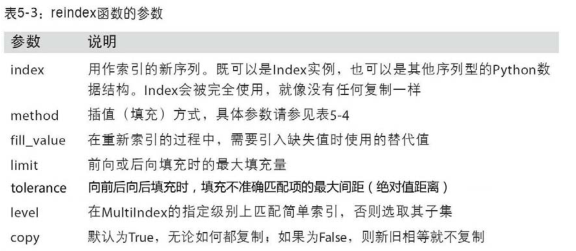

## 2.2 丢弃指定轴上的项(drop)

丢弃某条轴上的**一个或多个项**很简单，只要有一个__索引数组或列表__即可。由于需要执行一些数据整理和集合逻辑，所以**drop方法**返回的是一个在**指定轴**上__删除__了**指定值**的**新对象**：

### 2.2.1 Series的drop

In [123]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [124]:
new_obj = obj.drop('c')

new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [125]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

### 2.2.2 DataFrame的drop

对于DataFrame，可以删除**任意轴**上的__索引值__。DataFrame例子：

In [126]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index=['Ohio', 'Colorado', 'Utah', 'New York'], 
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


用**标签序列**调用drop会从__行标签(axis 0)__ 删除值：

In [128]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


通过传递**axis=1或axis='columns'** 可以删除__列__的值：

In [129]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [130]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


许多函数，如**drop**,会修改Series或DataFrame的__大小或形状__，可以**就地修改**对象，不会返回新的对象：

In [131]:
obj.drop('c',inplace=True)

obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

小心使用inplace，它会**销毁**所有被删除的数据。

## 2.3 索引、选取和过滤

### 2.3.1 Series索引

Series索引(obj[...])的工作方式**类似于NumPy数组**的索引，只不过Series的__索引值不只是整数__。下面是几个例子：

In [135]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [136]:
obj['b']

1.0

In [137]:
obj[1]

1.0

In [138]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [139]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [140]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [141]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

利用**标签的切片**运算与__普通的Python切片__运算不同，其**末端是包含**的：

In [142]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

用**切片**可以对Series的__相应部分__进行**设置**：

In [143]:
obj['b':'c'] = 5

obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

### 2.3.2 DataFrame索引

用**一个值或序列**对DataFrame进行__索引__其实就是获取__一个或多个列__：

In [144]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)), 
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [145]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [146]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


这种索引方式有几个**特殊的情况**:

- 首先通过__切片或布尔型数组__选取数据：

In [149]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [150]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


选取__行__的语法data[:2]十分方便。向[ ]传递**单一的元素或列表**，就可选择**列**。

不太理解为什么是可以选择列，应该是写错了。

- 另一种用法是通过**布尔型DataFrame**(比如下面这个由标量比较运算得出的)进行__索引__：

In [151]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [152]:
data[data < 5] = 0

data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


这使得DataFrame的语法与**NumPy二维数组**的__语法__很像。

## 2.4 用loc和iloc进行选取

对于**DataFrame**的__行的标签索引__，引入了特殊的标签运算符**loc和iloc**。

它们可以让你用__类似NumPy的标记__，使用**轴标签(loc)** 或__整数索引(iloc)__ ，从DataFrame选择**行和列的子集**。

作为一个初步示例，
- 让我们通过**标签**选择__一行和多列__：

In [156]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

- 然后用**iloc和整数**进行选取：

In [157]:
data.iloc[2, [3,0,1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [158]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [159]:
data.iloc[[1,2], [3,0,1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


- 这两个**索引函数**也适用于__一个标签或多个标签__的**切片**：

In [160]:
data.loc[:'Utah','two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [161]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


所以，在pandas中，有**多个方法**可以__选取和重新组合__数据。对于**DataFrame**，下表进行了总结。

后面会看到，还有更多的方法进行**层级化索引**。

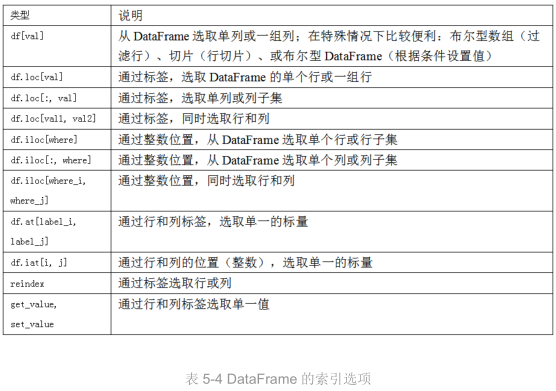

笔记：在一开始设计pandas时，觉得用frame[:, col]选取列**过于繁琐**(也容易出错)，因为列的选择是非常常见的操作。

因此做了些取舍，将**花式索引**的功能__(标签和整数)__ 放到了**ix运算符**中。

在实践中，这会导致许多边缘情况，数据的轴标签是整数，所以 pandas 团队决定创造**loc和iloc运算符**分别处理__严格__基于**标签和整数**的索引。 

ix运算符仍然可用，但**并不推荐**。

## 2.5 整数索引

- 处理**整数索引**的__pandas对象__常常难住新手，因为它与Python内置的**列表和元组**的__索引语法不同__。

例如，你可能不认为下面的代码会出错：

In [162]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [164]:
# ser[-1] # KeyError

这里，pandas可以**勉强进行**整数索引，但是会导致__小bug__。(实际在当前pandas版本中，会报错)

我们有包含0,1,2的索引，但是引入**用户想要的东西**(基于__标签或位置__的索引)很难：

In [165]:
# 整数索引
ser

0    0.0
1    1.0
2    2.0
dtype: float64

- 另外，对于**非整数索引**，不会产生歧义：

In [166]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [167]:
ser2[-1]

2.0

为了进行统一，如果**轴索引**含有__整数__，数据选取**总会使用标签**。

为了**更准确**，请使用__loc(标签)或iloc(整数)__：

In [169]:
# 与2.3.1中利用标签的切片对比
ser[:1]

0    0.0
dtype: float64

In [170]:
# 利用标签的切片,左右均为闭区间
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [172]:
# 利用整数的切片，左闭右开
ser.iloc[:1]

0    0.0
dtype: float64

总之，对Series和DataFrame的索引、切片操作，最好使用：
- loc(标签)
- iloc(整数)

## 2.5 算术运算和数据对齐

pandas**最重要**的一个功能是，它可以对__不同索引的//对象__进行**算术运算**。在将对象__相加__时，如果**存在**不同的索引对，则结果的索引就是该索引对的**并集**。

对于有数据库经验的用户，这就像在**索引标签**上进行__自动外连接__。看一个简单的例子：

### 2.5.1 Series

In [173]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [174]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

将它们__相加__就会产生：

In [175]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

**自动的数据对齐操作**在__不重叠的索引处__引入了**NA值**。缺失值会在算术运算过程中**传播**。

### 2.5.2 DataFrame

对于DataFrame，**对齐操作**会__同时__发生在__行和列__上：

In [176]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), 
                   columns=list('bcd'), 
                   index=['Ohio', 'Texas', 'Colorado'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [178]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), 
                   columns=list('bde'), 
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


- 把它们**相加**后将会返回一个__新的DataFrame__，其**索引和列**为原来那两个DataFrame的__并集__：

In [179]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


因为'c'和'e'__列__ 均不**同时**在两个DataFrame对象中，在结果中以__缺省值__呈现。

**行**也是同样。

- 如果DataFrame对象**相加**，没有__共用__的**列或行标签**，结果都会是__空__：

In [180]:
df1 = pd.DataFrame({'A':[1,2]})
df1

,A
0,1
1,2


In [181]:
df2 = pd.DataFrame({'B':[3,4]})
df2

,B
0,3
1,4


In [183]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


## 2.6 在算术方法中填充值

在对**不同索引的//对象**进行__算术运算__时，你可能希望当一个对象中**某个轴标签**在另一个对象中__找不到时__填充一个**特殊值**(比如 0)：

In [185]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [187]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [190]:
df2.loc[1,'b'] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


将它们**相加**时，__没有重叠__的位置就会产生**NA值**：

In [191]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


使用df1的**add方法**，传入df2以及一个__fill_value参数__：

In [192]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


下表列出了Series和DataFrame的**算术方法**。
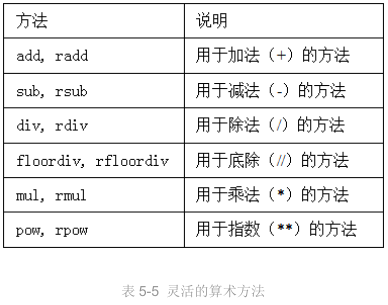

它们每个都有一个**副本**，以字母**r**开头，它会__翻转参数__。因此这两个语句是__等价__的：

In [200]:
1 / df1 

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


In [201]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


In [202]:
df1.div(df2) # df1 / df2

,a,b,c,d,e
0,NaN,1.000000,1.000000,1.000000,NaN
1,0.8,NaN,0.857143,0.875000,NaN
2,0.8,0.818182,0.833333,0.846154,NaN
3,NaN,NaN,NaN,NaN,NaN


In [203]:
df2.rdiv(df1) # df1 / df2

,a,b,c,d,e
0,NaN,1.000000,1.000000,1.000000,NaN
1,0.8,NaN,0.857143,0.875000,NaN
2,0.8,0.818182,0.833333,0.846154,NaN
3,NaN,NaN,NaN,NaN,NaN


与此类似，在对Series或DataFrame**重新索引**时，也可以指定一个__填充值__:

In [206]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


## 2.7 DataFrame和Series之间的运算

跟**不同维度**的__NumPy数组__一样，DataFrame和Series之间**算术运算**也是有__明确规定__的。

先来看一个具有启发性的例子，计算一个**二维数组**与__其某行__之间的**差**：

In [207]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [208]:
arr[0]

array([0., 1., 2., 3.])

In [209]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

当我们从arr减去arr[0]，**每一行**都会执行这个操作。这就叫做__广播__(broadcasting)，附录A将对此进行详细讲解。

DataFrame和Series之间的运算**差不多**也是如此：

In [212]:
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),
                     columns = list('bde'),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon']
)
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [213]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

- **默认**情况下，DataFrame和Series之间的__算术运算__会将Series的索引匹配到DataFrame的**列**，然后__沿着行__一直__向下广播__：

In [214]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


如果**某个索引值**在DataFrame的__列或Series的索引中__找不到，则参与运算的两个对象就会被**重新索引**以形成__并集__:

In [215]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [216]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


- 如果希望**匹配行**且__在列上广播__，则必须使用**算术运算方法**。例如：

In [218]:
series3 = frame['d']

series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [219]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [220]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


传入的**轴号**就是__希望匹配的轴__。

在本例中，我们的目的是**匹配**DataFrame的__行索引__(axis='index' or axis=0)并进行**广播**。

## 2.8 函数应用和映射

- NumPy的**ufuncs**(__元素级__数组方法)也可用于操作__pandas对象__：

In [221]:
frame = pd.DataFrame(np.random.randn(4,3),
                     columns = list('bde'),
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon']
)
frame

,b,d,e
Utah,-1.091749,-0.700675,0.231747
Ohio,-1.798712,1.017699,-0.231339
Texas,0.411281,0.433310,-0.731533
Oregon,-0.607976,0.780828,-0.108479


In [222]:
np.abs(frame)

,b,d,e
Utah,1.091749,0.700675,0.231747
Ohio,1.798712,1.017699,0.231339
Texas,0.411281,0.433310,0.731533
Oregon,0.607976,0.780828,0.108479


- 另一个常见的操作是，将**函数**应用到由__各列或行__所形成的**一维数组**上。DataFrame的__apply方法__即可实现此功能：

In [223]:
f = lambda x: x.max() - x.min()

In [224]:
frame.apply(f)

b    2.209994
d    1.718375
e    0.963280
dtype: float64

这里的函数f，计算了**一个Series**的最大值和最小值的差，在frame的__每列__都执行了一次。结果是一个**Series**，使用frame的__列__作为**索引**。

如果传递__axis='columns'__到apply，这个函数会在**每行**执行：

In [225]:
frame.apply(f, axis='columns')

Utah      1.323496
Ohio      2.816411
Texas     1.164843
Oregon    1.388804
dtype: float64

许多最为常见的**数组统计功能**都被实现成__DataFrame的方法__(如**sum和mean**)，因此无需使用apply方法。

传递到apply的函数**不是必须**返回__一个标量__，还可以返回由**多个值**组成的__Series__：

In [226]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [227]:
frame.apply(f)

,b,d,e
min,-1.798712,-0.700675,-0.731533
max,0.411281,1.017699,0.231747


- **元素级的Python函数**也是可以用的。

假如想得到frame中**各个浮点值**的__格式化字符串__，使用__applymap__即可：

In [230]:
format = lambda x: '%.2f' % x

In [231]:
frame.applymap(format)

,b,d,e
Utah,-1.09,-0.70,0.23
Ohio,-1.80,1.02,-0.23
Texas,0.41,0.43,-0.73
Oregon,-0.61,0.78,-0.11


之所以叫做applymap，是因为**Series**有一个用于__应用元素级函数__的**map方法**：

In [232]:
frame['e'].map(format)

Utah       0.23
Ohio      -0.23
Texas     -0.73
Oregon    -0.11
Name: e, dtype: object

## 2.9 排序和排名

### 2.9.1 排序

根据**条件**对数据集__排序(sorting)__ 也是一种重要的__内置运算__。要对**行或列索引**进行排序(按__字典顺序__)，可使用**sort_index方法**，它将返回一个已排序的__新对象__：

- Series

In [233]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

obj

d    0
a    1
b    2
c    3
dtype: int64

In [234]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

- DataFrame

对于DataFrame，则可以根据**任意一个轴上的索引**进行__排序__：

In [236]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)), 
                     index=['three', 'one'], 
                     columns=['d', 'a', 'b', 'c'])

frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [237]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [238]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


数据**默认**是按__升序__排序的，但也可以__降序__排序：

In [239]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


- 若要按__值__对**Series**进行排序，可使用其**sort_values方法**：

In [241]:
obj = pd.Series([4, 7, -3, 2])

obj

0    4
1    7
2   -3
3    2
dtype: int64

In [242]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

在排序时，任何**缺失值默认**都会被放到__Series的末尾__：

In [240]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

- 当排序一个**DataFrame**时，你可能希望根据__一个或多个列__中的__值__进行排序。将一个或多个列的**名字**传递给**sort_values的by选项**即可达到该目的：

In [243]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [244]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


要根据**多个列**进行排序，传入__名称的列表__即可：

In [245]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


### 2.9.2 排名

排名会**从1开始**一直到数组中__有效数据的数量__。接下来介绍Series和DataFrame的**rank方法**。

- **默认**情况下，rank是通过"为各组分配一个__平均排名__"的方式**破坏平级关系**的：

In [246]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [247]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

- 也可以根据**值**在__原数据__中__出现的顺序__给出排名(破坏平级关系)：

In [248]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

这里，条目0和2没有使用**平均排名6.5**，它们被设成了6和7，因为数据中标签0位于标签2的前面。

也可以按**降序**进行排名：

In [249]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

下表列出了所有用于**破坏平级关系**的__method选项__。

DataFrame可以在**行或列**上计算排名：

In [250]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]})

frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [251]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


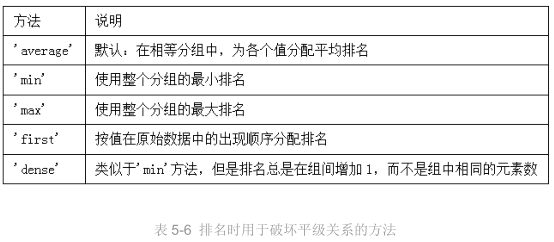

## 2.10 带有重复标签的轴索引

直到目前为止，所介绍的所有范例都有着**唯一的轴标签(索引值)**。

虽然**许多**pandas函数(如reindex)都要求__标签唯一__，但这**并不是强制性**的。

- 来看看下面这个简单的带有重复索引值的Series:

In [252]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

**索引**的__is_unique属性__可以告诉你它的**值是否是唯一**的：

In [253]:
obj.index.is_unique

False

对于带有**重复值的索引**，__数据选取__的行为将会__有些不同__。

如果某个索引对应**多个值**，则返回一个__Series__；
而对应**单个值**的，则返回一个__标量值__：

In [254]:
obj['a']

a    0
a    1
dtype: int64

In [255]:
obj['c']

4

这样会使代码**变复杂**，因为__索引的输出类型__会根据标签是否有重复发生**变化**。

- 对**DataFrame的行**进行索引时也是如此：

In [256]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

df

,0,1,2
a,0.207281,-1.248843,-1.062647
a,-1.028435,0.630395,-2.126219
b,-0.562004,0.322774,-1.173710
b,0.413372,-0.346348,-0.065395


In [257]:
df.loc['b']

,0,1,2
b,-0.562004,0.322774,-1.173710
b,0.413372,-0.346348,-0.065395


# 3.汇总和计算描述统计

**pandas对象**拥有一组常用的__数学和统计方法__。它们大部分都属于**约简和汇总统计**，
- 用于从Series中提取单个值(如sum或mean)
- 或从DataFrame的行或列中提取一个 Series。

跟对应的**NumPy数组方法**相比，它们都是基于__没有缺失数据的假设__而构建的。看一个简单的__DataFrame__：

In [260]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], 
                  index=['a', 'b', 'c', 'd'], 
                  columns=['one', 'two'])

df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


- 约简方法

调用DataFrame的**sum方法**将会返回一个含有__列的和__的**Series**：

In [261]:
df.sum()

one    9.25
two   -5.80
dtype: float64

传入**axis='columns'或axis=1**将会__按行__进行求和运算:(注意：当前版本中，skip=True时，全NA值的行，和为0)

In [262]:
df.sum(axis=1)

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA值会__自动被排除__，除非整个切片(这里指的是行或列)都是NA。通过**skipna选项**可以__禁用__该功能：

In [263]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

下表列出了这些**约简方法**的__常用选项__。
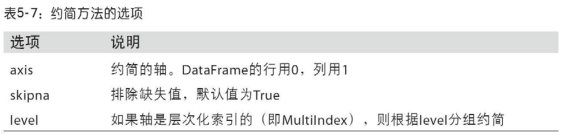

- 有些方法(如__idxmin和idxmax__)返回的是**间接统计**(比如__达到最小值或最大值的索引__)：

In [265]:
df.idxmax()

one    b
two    d
dtype: object

- 另一些方法则是**累计型**的:

In [266]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


- 还有一种方法，它既不是约简型也不是累计型。**describe**就是一个例子，它用于__一次性产生多个汇总统计__：

In [267]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


对于**非数值型数据**，describe会产生另外一种汇总统计：

In [268]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [269]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

下表列出了所有与**描述统计**相关的方法。
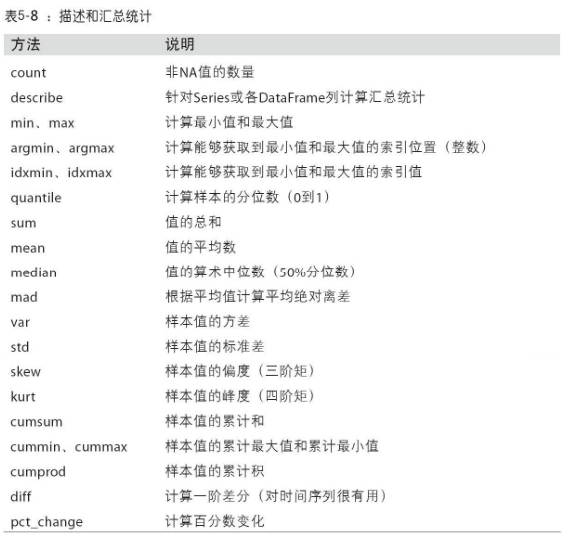

## 3.1 相关系数与协方差

有些**汇总统计(如相关系数和协方差)** 是通过__参数对__计算出来的。

来看几个DataFrame，它们的数据来自Yahoo!Finance的股票价格和成交量，使用的是pandas-datareader包(可以用conda或pip安装）：

使用__pandas_datareader模块__下载一些股票数据：

In [270]:
import pandas_datareader.data as web

In [271]:
all_data = {ticker: web.get_data_yahoo(ticker) 
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Adj Close'] 
                     for ticker, data in all_data.items()}) 

volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

注意：此时Yahoo! Finance已经不存在了，因为2017年Yahoo!被Verizon收购了。参阅**pandas-datareader文档**，可以学习最新的功能。

现在计算价格的**百分数变化**，__时间序列的操作__会在第11章介绍：

In [272]:
returns = price.pct_change()

In [273]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2019-06-19,-0.002923,0.005133,0.003921,-0.001151
2019-06-20,0.008036,0.012912,0.009286,0.008246
2019-06-21,-0.003409,0.002521,0.000146,0.009411
2019-06-24,-0.001006,0.001078,0.005914,-0.005669
2019-06-25,-0.015158,-0.007104,-0.031572,-0.026149


### 3.1.1 Series 

- Series的**corr方法**用于计算两个Series中__重叠的、非NA的、按索引对齐的值__的**相关系数**。

- 与此类似，**cov**用于计算__协方差__：

In [274]:
returns['MSFT'].corr(returns['IBM'])

0.4870579333972048

In [277]:
returns['MSFT'].cov(returns['IBM'])

8.680743356886965e-05

因为MSTF是一个**合理的Python属性**，我们还可以用__更简洁的语法__选择列：

In [278]:
returns.MSFT.corr(returns.IBM)

0.4870579333972048

### 3.1.2 DataFrame

DataFrame的**corr和cov方法**将以__DataFrame的形式__分别返回**完整的相关系数或协方差矩阵**：

In [279]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.379376,0.453093,0.461116
IBM,0.379376,1.000000,0.487058,0.403112
MSFT,0.453093,0.487058,1.000000,0.538028
GOOG,0.461116,0.403112,0.538028,1.000000


In [280]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000266,0.000076,0.000107,0.000116
IBM,0.000076,0.000152,0.000087,0.000077
MSFT,0.000107,0.000087,0.000209,0.000120
GOOG,0.000116,0.000077,0.000120,0.000239


利用DataFrame的**corrwith方法**，可以计算其__列或行__跟**另一个Series或DataFrame**之间的__相关系数__。
- 传入一个**Series**将会返回一个**相关系数值Series**(针对__各列__进行计算)：

In [281]:
returns.corrwith(returns.IBM)

AAPL    0.379376
IBM     1.000000
MSFT    0.487058
GOOG    0.403112
dtype: float64

- 传入一个**DataFrame**则会计算__按列名配对__的**相关系数**。这里，计算百分比变化与成交量的相关系数：

In [282]:
returns.corrwith(volume)

AAPL   -0.061945
IBM    -0.156114
MSFT   -0.090037
GOOG   -0.020494
dtype: float64

传入**axis='columns'**即可__按行__进行计算。无论如何，在计算相关系数__之前__，所有的**数据项**都会__按标签对齐__。

## 3.2 唯一值、值计数以及成员资格

### 3.2.1 Series

还有一类方法可以从**一维 Series的值**中__抽取信息__。看下面的例子：

In [283]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

- 第一个函数是**unique**，它可以得到__Series__中的__唯一值数组__：

In [285]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

返回的**唯一值**是__未排序__的，如果需要的话，可以对结果再次进行**排序**(__uniques.sort()__)。

- 相似的,**value_counts**用于计算一个__Series__中**各值出现的频率**：

In [287]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

为了便于查看，__结果Series__是**按值频率降序**排列的。

- value_counts还是一个**顶级pandas方法**，可用于__任何数组或序列__：

In [289]:
pd.value_counts(obj.values, sort=False)

b    2
d    1
a    3
c    3
dtype: int64

- **isin**用于判断__矢量化集合__的**成员资格**，可用于过滤__Series中或DataFrame列__中数据的**子集**：

In [290]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [291]:
mask = obj.isin(['b', 'c'])

In [292]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [293]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

- 与isin类似的是**Index.get_indexer方法**，它可以给你__一个索引数组__，从**可能包含重复值的数组**到另一个__不同值的数组__：

In [294]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

unique_vals = pd.Series(['c', 'b', 'a'])

pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

下表给出了这几个方法的一些**参考信息**：
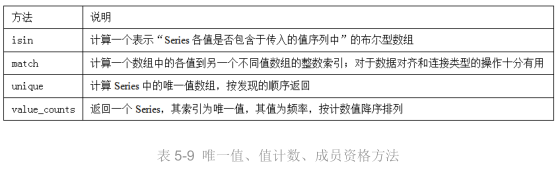

### 3.2.2 DataFrame

有时，你可能希望得到DataFrame中**多个相关列**的一张__柱状图__。例如：

In [295]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3], 
                     'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


将**pandas.value_counts**传给该DataFrame的__apply函数__，就会出现：

In [296]:
result = data.apply(pd.value_counts).fillna(0)

result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


这里，结果中的**行标签**是__所有列的唯一值__。后面的**频率值**是__每个列中这些值的相应计数__。

# 4.总结

在下一章，将讨论用**pandas读取(或加载)和写入数据集**的__工具__。 之后，将更深入地研究使用**pandas进行数据清洗、规整、分析和可视化工
具**。